Argumentation:



A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks. This is where the Data Augmentation technique comes in, which, as its name indicates, allows us to augment our dataset in two ways:# Aumentacion de Datos
Un problema habitual, es la cantidad de datos de los que se dispone para entrar los modelos, para que estos presenten los resultados esperados es necesario que el entrenamiento ocurra con una gran cantidad de datos (dataset), pero en muchas ocasiones no se dispone de los datos necesario para realizar estas tareas.
Es aquí donde entra la técnica **Data Augmentation** que, como indica su nombre, nos permite aumentar nuestro dataset de dos formas:




*   Introducing perturbations in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
*   Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.





At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.



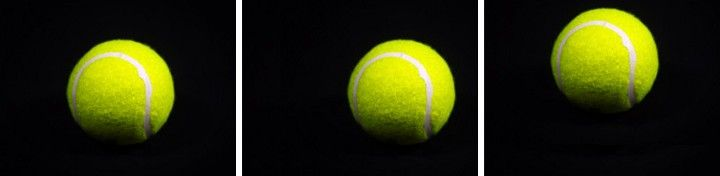



The same ball but whit some traslations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1. Turn (Flip)
2. Rotation

1. Scale
2. Trim

1. Translation
2. Gaussian noise








The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments ** width_shift_range ** and ** height_shift_range **.
* Flip the image using the ** horizontal_flip ** and ** vertical_flip ** arguments.
* Rotations of images through the argument ** rotation_range **
* Image brightness using the ** brightness_range ** argument.
* Image zoom using the ** zoom_range ** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.



In [6]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


First we put an internet image

---




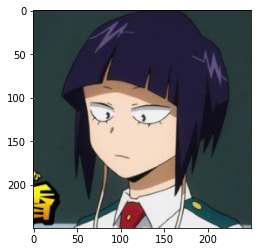

In [7]:
url = 'https://pbs.twimg.com/media/Djh7DGlW4AA2Z4K.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image and
n one direction, such as horizontally or vertically, while maintaining the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


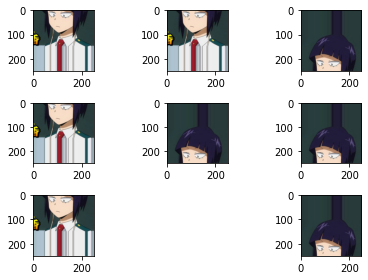

In [8]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument ** horizontal_flip ** or ** vertical_flip ** for the ** ImageDataGenerator ** class.

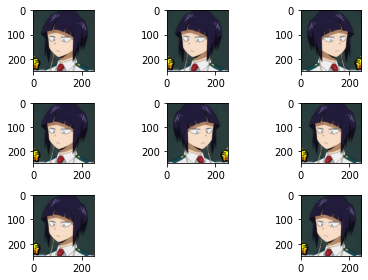

In [9]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

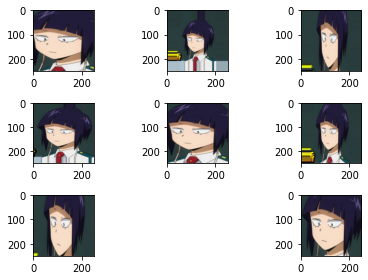

In [10]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

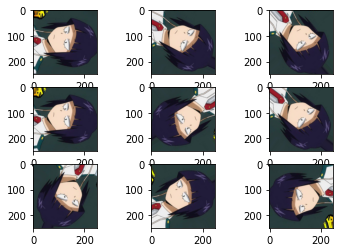

In [11]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.




              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

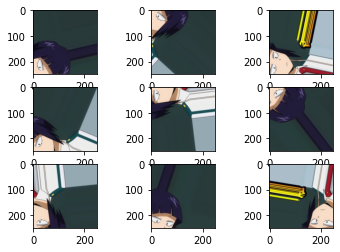

In [12]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Arguments extra (ImageDataGenerator):

  **directory:** Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.
        
  **labels:** Either "inferred" (labels are generated from the directory structure), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).
  
  **label_mode:** - 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss). - 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss). - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).
      
  **class_names:**Only valid if "labels" is "inferred". This is the explict list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).
  
  **color_mode:** One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.
   
   **batch_size:** Size of the batches of data. Default: 32.
   
   **image_size:** Size to resize images to after they are read from disk. Defaults to (256, 256). Since the pipeline processes batches of images that must all have the same size, this must be provided.
   
  **shuffle:** Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.
   
   **seed:** Optional random seed for shuffling and transformations.
    
  **validation_split:** Optional float between 0 and 1, fraction of data to reserve for validation.
   
   **subset:** One of "training" or "validation". Only used if validation_split is set.
    
  **interpolation:** String, the interpolation method used when resizing images. Defaults to bilinear. Supports bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.
    
  **follow_links:** Whether to visits subdirectories pointed to by symlinks. Defaults to False.


Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [5]:
!pip install textattack

ERROR: Operation cancelled by user


In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-09 21:37:47 INFO: Downloading default packages for language: en (English)...
2020-10-09 21:39:27 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack nos proporciona cuatro métodos para el aumento de datos.


## WordNetAugmenter
Aumenta el texto reemplazándolo con sinónimos del tesauro (diccionario de sinónimos) de WordNet.

WordNet es una base de datos léxica del inglés. Los sustantivos, verbos, adjetivos y adverbios se agrupan en conjuntos de sinónimos cognitivos (synsets), cada uno de los cuales expresa un concepto distinto.
WordNet se parece superficialmente a un tesauro, ya que agrupa las palabras en función de su significado.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on life and enounce, I wish I had, or I’m glad I did?']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:13<00:00, 35.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp5nhskcvl.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you look back on life and say, I wish I had, or I’m delighted I did?']

## CharSwapAugmenter
Aumenta el texto sustituyendo, eliminando, insertando e intercambiando caracteres adyacentes.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you jlook back on life and say, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
Esto aumenta el texto con una combinación de reemplazo de sinónimos de Wordnet, eliminación de palabras, cambios de orden de palabras e inserciones de sinónimos. Todas estas 4 funcionalidades ocurren de forma aleatoria. Entonces obtendremos resultados diferentes cada vez que ejecutemos el código. Esto devuelve 4 resultados aumentados, a diferencia de los otros métodos.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back front on life and say, I wish I had, or I’m glad I did?',
 'Will you look gage on life and say, I wish I had, or I’m glad I did?',
 'wish you look back on life and say, I Will I had, or I’m glad I did?',
 'Will you look back life and say, I wish I had, or I’m glad I did?']

Googletrans  utiliza la API Ajax de Google Translate para la detección y traducción de idiomas.

Los parámetros clave para el método **translate ()** son:



1.   **src**: idioma de origen. este parámetro es opcional ya que **googletrans** lo detectará.
2.   **dest**: idioma de destino. Parámetro obligatorio.

1.   **text**: el texto que se va a traducir del idioma de origen al idioma de destino. Parámetro obligatorio.





 



Al utilizar este metodo lo que ocurre es una retraduccion, pasamos del idioma original a un idioma destino y luego regresamos al original, durante esta retrotraducción, hay un ligero cambio en la oración entre el texto original y el texto retrotraducido, pero el significado general de la oración aún se conserva.

Los idiomas soportados se pueden consultar en https://cloud.google.com/translate/docs/languages?hl=es

Para obtener los mejores resultados se recomienda hacer algunas pruebas con los idiomas, si el lenguaje destino es muy similar la traduccion no pierde informacion, sin embargo se puede tener el problema de que la traduccion sea demasiado literal, esto se vuelve un poco un problema de prueba y error.


Algunos ejemplos de idiomas:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 972kB 13.5MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=9ec598d60050848178252b4865cf48c183ecd0e20fe43477001f02cc009d24ef
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4a5e5eab9a5f1aed0dda9b8a3f0e66dedca848a10bb6448495fbda5dfbdc70cf
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.
